<h1>UK Road Accidents</h1>
<hr>
<h3>Tanay, Xynex Kim R.</h3>
<h3>BSIT 3A</h3>

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
uk_accidents = pd.read_csv("datasets//uk_road_accident.csv")

In [3]:
uk_accidents

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


<h2>Changing the Data Type</h2>
<hr>

In [4]:
uk_accidents.dtypes

Index                       object
Accident_Severity           object
Accident Date               object
Latitude                   float64
Light_Conditions            object
District Area               object
Longitude                  float64
Number_of_Casualties         int64
Number_of_Vehicles           int64
Road_Surface_Conditions     object
Road_Type                   object
Urban_or_Rural_Area         object
Weather_Conditions          object
Vehicle_Type                object
dtype: object

In [5]:
# Step 1: Convert to string only if not null
uk_accidents['Accident Date'] = uk_accidents['Accident Date'].astype(str)
# Step 2: Replace '/' with '-' safely
uk_accidents['Accident Date'] = uk_accidents['Accident Date'].apply(lambda x: x.replace('/', '-') if pd.notnull(x) else x)
# Step 3: Strip whitespace
uk_accidents['Accident Date'] = uk_accidents['Accident Date'].apply(lambda x: x.strip() if pd.notnull(x) else x)
# Step 4: Convert to datetime
uk_accidents['Accident Date'] = pd.to_datetime(uk_accidents['Accident Date'], dayfirst=True, errors='coerce')

In [6]:
uk_accidents['Accident_Severity'] = uk_accidents['Accident_Severity'].astype('category')
# uk_accident['Latitude'] = uk_accident['Latitude'].astype('category')
uk_accidents['Light_Conditions'] = uk_accidents['Light_Conditions'].astype('category')
uk_accidents['District Area'] = uk_accidents['District Area'].astype('category')
# uk_accident['Longitude'] = uk_accident['Longitude'].astype('category')
uk_accidents['Road_Surface_Conditions'] = uk_accidents['Accident_Severity'].astype('category')
uk_accidents['Road_Type'] = uk_accidents['Road_Type'].astype('category')
uk_accidents['Urban_or_Rural_Area'] = uk_accidents['Urban_or_Rural_Area'].astype('category')
uk_accidents['Weather_Condions'] = uk_accidents['Weather_Conditions'].astype('category')
uk_accidents['Vehicle_Type'] = uk_accidents['Vehicle_Type'].astype('category')

In [7]:
uk_accidents.dtypes

Index                              object
Accident_Severity                category
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                 category
District Area                    category
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions          category
Road_Type                        category
Urban_or_Rural_Area              category
Weather_Conditions                 object
Vehicle_Type                     category
Weather_Condions                 category
dtype: object

In [8]:
uk_accidents['Accident Date'].describe()

count                           660679
mean     2020-11-30 08:30:32.761749760
min                2019-01-01 00:00:00
25%                2019-11-27 00:00:00
50%                2020-11-13 00:00:00
75%                2021-11-17 00:00:00
max                2022-12-31 00:00:00
Name: Accident Date, dtype: object

<hr>

<h2>Filling null values.</h2>

In [9]:
uk_accidents.isnull()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Weather_Condions
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
660675,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
660676,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
660677,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
uk_accidents.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions        0
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
Weather_Condions           14128
dtype: int64

In [11]:
uk_accidents['Latitude'] = uk_accidents['Latitude'].fillna(uk_accidents['Latitude'].mode()[0])
uk_accidents['Longitude'] = uk_accidents['Longitude'].fillna(uk_accidents['Longitude'].mode()[0])
uk_accidents['Urban_or_Rural_Area'] = uk_accidents['Urban_or_Rural_Area'].fillna(uk_accidents['Urban_or_Rural_Area'].mode()[0])
uk_accidents['Weather_Conditions'] = uk_accidents['Weather_Conditions'].fillna(uk_accidents['Weather_Conditions'].mode()[0])
uk_accidents['Accident Date'] = uk_accidents['Accident Date'].fillna(uk_accidents['Accident Date'].mean())
uk_accidents['Road_Type'] = uk_accidents['Road_Type'].fillna(uk_accidents['Road_Type'].mode()[0])

<h3>Removing columns that shouldn't be part of the dataset.</h3>

In [12]:
columns_to_drop = ['Weather_Condions', 'Weather_CondionsWeather_Condions']
uk_accidents.drop(columns=[col for col in columns_to_drop if col in uk_accidents.columns], inplace=True)

In [13]:
uk_accidents.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

<hr>

<h2>Extracting date information using pandas date time</h2>

In [14]:
uk_accidents['Year'] = uk_accidents['Accident Date'].dt.year
uk_accidents['Month'] = uk_accidents['Accident Date'].dt.month
uk_accidents['Day'] = uk_accidents['Accident Date'].dt.day
uk_accidents['DayOfWeek'] = uk_accidents['Accident Date'].dt.dayofweek # Monday=0 Sunday=6

In [15]:
from scipy.stats import f_oneway

<hr>

<h2>01. What's the total count of accident reports in the dataset?</h2>

In [16]:
uk_accidents["Index"].value_counts()

Index
2.01E+12         239478
2.01E+86              4
2.01E+197             4
2.01E+98              4
2.01E+175             4
                  ...  
201091NM01760         1
201091NM01881         1
201091NM01935         1
201091NM01964         1
201091NM02142         1
Name: count, Length: 421020, dtype: int64

<h3>Insight: The dataset contains 421,020 unique accident records, providing a large amount of information that can help analyze road safety and accident trends.</h3>

<hr>

<h2>02. How many district areas are there in the dataset?</h2>

In [17]:
uk_accidents["District Area"].unique()

['Kensington and Chelsea', 'Westminster', 'Richmond upon Thames', 'Hammersmith and Fulham', 'Hounslow', ..., 'County Durham', 'Shropshire', 'Central Bedfordshire', 'Cornwall', 'Wiltshire']
Length: 422
Categories (422, object): ['Aberdeen City', 'Aberdeenshire', 'Adur', 'Allerdale', ..., 'Wycombe', 'Wyre', 'Wyre Forest', 'York']

In [18]:
uk_accidents["District Area"].value_counts()

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

<h3>Insight: The dataset has accident information from 422 different district areas, which means it includes many places from big cities to small towns. This wide coverage helps us understand how accidents happen in different types of locations, giving a better overall picture of road safety.</h3>
<hr>

<h2>03. Which district area reports the most accidents?</h2>

In [19]:
uk_accidents['District Area'].value_counts()

District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

<h3>Insight: The records show that the Birmingham area has the highest number of accidents compared to other areas. This may be because Birmingham is a large and busy city with heavy traffic, more vehicles on the road, and crowded streets, which makes accidents more likely to happen.</h3>

<hr>
<h2>04. Which weather condition is associated with the highest number of accidents?</h2>

In [20]:
uk_accidents["Weather_Conditions"].value_counts()

Weather_Conditions
Fine no high winds       535013
Raining no high winds     79696
Other                     17150
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

<h3>Insight 01:
Most accidents happened during Fine no high winds weather conditions, which had the highest number of recorded incidents. This suggests that even in good weather, accidents remain common, possibly due to higher traffic volumes.</h3>

<h3>Insight 02:
The fewest accidents occurred during Snowing high winds conditions. This could be because fewer people drive in severe weather or drivers are more cautious when conditions are dangerous.</h3>

<hr>

<h2>05. Between urban and rural areas, where were the most casualties recorded?</h2>

In [21]:
areas_casualties = uk_accidents.groupby(['Urban_or_Rural_Area'])['Number_of_Casualties'].count()

In [22]:
areas_casualties

Urban_or_Rural_Area
Rural          238990
Unallocated        11
Urban          421678
Name: Number_of_Casualties, dtype: int64

<Axes: xlabel='Urban_or_Rural_Area'>

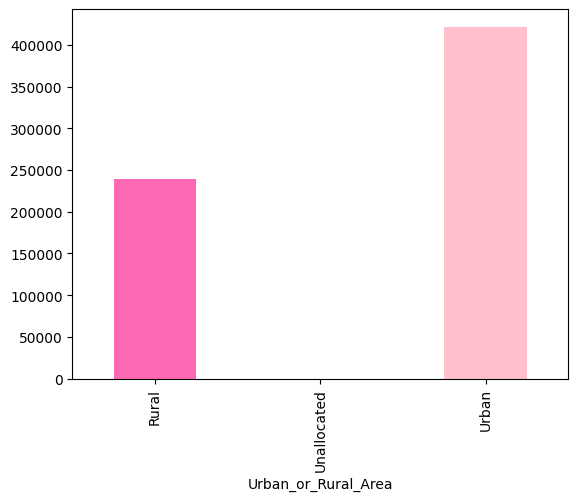

In [23]:
uk_accidents.groupby('Urban_or_Rural_Area')['Index'].size().plot(kind = 'bar', color = ["#FF69B4", "#FFB6C1", "#FFC0CB"])

<h3>Insight 01:
<strong>Urban Areas</strong> most casualties happened in urban areas, with 421,678 recorded. This is likely because cities have more traffic and people on the roads..</h3>

<h3>Insight 2:
<strong>Rural areas</strong> had 238,990 casualties. Even though fewer accidents happen there compared to cities, they can still be serious due to faster driving and fewer nearby services.</h3>

<h3>Insight 3: 
<strong>Unallocated</strong> only 11 casualties were marked as unallocated, meaning it wasn’t clear if they happened in a rural or urban area. This number is very small and doesn't affect the overall data much.</h3>

<hr>

<h2>06. Which of the three accident severity levels has the highest number of accidents?</h2>

In [24]:
serious_dataf = uk_accidents[uk_accidents['Accident_Severity'] == "Serious"]

In [25]:
serious_dataf

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Serious,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Serious,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Serious,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Serious,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
5,200701BS67159,Serious,2019-09-18,51.497750,Daylight,Kensington and Chelsea,-0.192556,2,3,Serious,Single carriageway,Urban,Fine no high winds,Car,2019,9,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660629,201091NL00686,Serious,2022-02-11,57.687933,Daylight,Shetland Islands,-4.176860,1,2,Serious,Single carriageway,Rural,Fine + high winds,Car,2022,2,11,4
660645,201091NL05842,Serious,2022-10-18,60.162660,Daylight,Shetland Islands,-1.165232,1,1,Serious,Single carriageway,Rural,Fine + high winds,Car,2022,10,18,1
660672,201091NM01085,Serious,2022-01-29,57.170725,Daylight,Highland,-3.852421,1,2,Serious,Single carriageway,Rural,Fine no high winds,Car,2022,1,29,5
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Serious,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2,23,2


In [26]:
slight_dataf = uk_accidents[uk_accidents['Accident_Severity'] == "Slight"]

In [27]:
slight_dataf

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Slight,Single carriageway,Urban,Fine no high winds,Other vehicle,2019,9,3,1
8,200701BS67515,Slight,2019-10-31,51.493319,Darkness - lights lit,Kensington and Chelsea,-0.173572,1,2,Slight,Single carriageway,Urban,Fine no high winds,Car,2019,10,31,3
9,200701BS67543,Slight,2019-10-18,51.484539,Daylight,Kensington and Chelsea,-0.175651,1,2,Slight,Single carriageway,Urban,Fine no high winds,Motorcycle over 125cc and up to 500cc,2019,10,18,4
13,200701BS67853,Slight,2019-11-08,51.508999,Darkness - lights lit,Kensington and Chelsea,-0.210701,3,2,Slight,Single carriageway,Urban,Other,Car,2019,11,8,4
14,200701BS67859,Slight,2019-11-01,51.485125,Darkness - lights lit,Kensington and Chelsea,-0.167129,1,1,Slight,One way street,Urban,Fine no high winds,Car,2019,11,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660671,201091NM01053,Slight,2022-01-29,57.572162,Daylight,Highland,-3.930799,1,1,Slight,Single carriageway,Rural,Other,Van / Goods 3.5 tonnes mgw or under,2022,1,29,5
660673,201091NM01190,Slight,2022-02-02,57.585152,Daylight,Highland,-3.748312,2,2,Slight,Single carriageway,Rural,Fine no high winds,Car,2022,2,2,2
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Slight,Single carriageway,Rural,Fine no high winds,Car,2022,2,18,4
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Slight,Single carriageway,Rural,Fine no high winds,Car,2022,2,21,0


In [28]:
fatal_dataf = uk_accidents[uk_accidents['Accident_Severity'] == "Fatal"]

fatal_dataf

In [29]:
serious_dataf["Accident_Severity"].value_counts()

Accident_Severity
Serious    88217
Fatal          0
Slight         0
Name: count, dtype: int64

In [30]:
slight_dataf["Accident_Severity"].value_counts()

Accident_Severity
Slight     563801
Fatal           0
Serious         0
Name: count, dtype: int64

In [31]:
fatal_dataf["Accident_Severity"].value_counts()

Accident_Severity
Fatal      8661
Serious       0
Slight        0
Name: count, dtype: int64

<Axes: xlabel='Accident_Severity'>

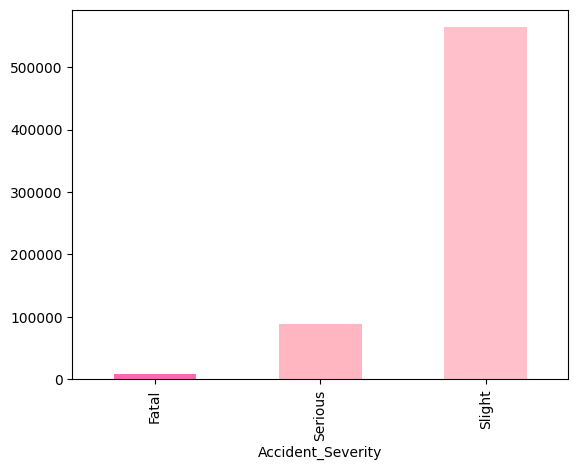

In [32]:
uk_accidents.groupby('Accident_Severity')['Index'].size().plot(kind = 'bar',color = ["#FF69B4", "#FFB6C1", "#FFC0CB"])


<h3>Insights:
Most accidents tend to be <strong>slight<strong>, meaning that while they happen often, they usually result in only minor injuries or damage. <strong>Serious</strong> accidents are much less common, but when they do occur, they can have a big impact, often leading to major injuries and longer recovery times. <strong>Fatal</strong> accidents happen the least, but because they involve the loss of life, every single case carries a huge weight, making it essential to keep working on ways to prevent them.</h3>

<hr>

<h2>07. Do the longitude and latitude coordinates of accidents show any correlation?</h2>

In [33]:
geographic_coor = uk_accidents['Latitude'].corr(uk_accidents['Longitude'])

In [34]:
geographic_coor

np.float64(-0.3981137948101017)

<h3>Insight: There is a moderate negative correlation (-0.40) between longitude and latitude, which probably reflects the general layout of where the accidents happened</h3>

<hr>

<h2>08. What Light Conditions has the highest number of occured accidents?</h2>

In [35]:
uk_accidents["Light_Conditions"].unique()

['Darkness - lights lit', 'Daylight', 'Darkness - lighting unknown', 'Darkness - lights unlit', 'Darkness - no lighting']
Categories (5, object): ['Darkness - lighting unknown', 'Darkness - lights lit', 'Darkness - lights unlit', 'Darkness - no lighting', 'Daylight']

In [36]:
uk_accidents["Light_Conditions"].value_counts()

Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

<h3>Insight 01: Most accidents occur during <strong>Daylight</strong>, mainly because this is when traffic is heaviest. More people are commuting, working, or traveling, which increases the chances of collisions even though visibility is good.
</h3>

<h3>Insight 02: The fewest accidents happen in <strong>Darkness</strong> – lights unlit. While this is one of the most dangerous conditions to drive in, very few vehicles are actually on the road at these times, so the overall number of accidents stays low.</h3>

<hr>
<h2>09. What type of a vehicle that often engaged from accidents?</h2>

In [37]:
uk_accidents["Vehicle_Type"].mode()

0    Car
Name: Vehicle_Type, dtype: category
Categories (16, object): ['Agricultural vehicle', 'Bus or coach (17 or more pass seats)', 'Car', 'Data missing or out of range', ..., 'Pedal cycle', 'Ridden horse', 'Taxi/Private hire car', 'Van / Goods 3.5 tonnes mgw or under']

<h3>Insight: The data shows that <strong>cars</strong> are the vehicles most often involved in accidents. This is expected because cars are the most common type of vehicle on the road, so they have more chances of getting into accidents compared to buses, bikes, or other vehicles.</h3>
<hr>

<h2>10. What road condition is most common in urban areas, considering that many accidents mostly occur there? </h2>

In [38]:
urban_area = uk_accidents[uk_accidents['Urban_or_Rural_Area'] == "Urban"]

In [39]:
urban_area

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Serious,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Serious,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Serious,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Serious,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Slight,Single carriageway,Urban,Fine no high winds,Other vehicle,2019,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660293,201063DP33610,Slight,2022-10-29,52.509366,Daylight,Powys,-3.331382,1,2,Slight,Single carriageway,Urban,Fine + high winds,Car,2022,10,29,5
660309,201063DP35210,Slight,2022-11-05,52.513065,Daylight,Powys,-3.314105,1,2,Slight,Single carriageway,Urban,Other,Car,2022,11,5,5
660311,201063DP35410,Fatal,2022-10-28,52.515278,Darkness - lights lit,Powys,-3.317265,1,1,Fatal,Single carriageway,Urban,Fine no high winds,Other vehicle,2022,10,28,4
660382,201063DP42910,Slight,2022-12-21,52.514222,Daylight,Powys,-3.315171,1,1,Slight,One way street,Urban,Snowing no high winds,Car,2022,12,21,2


In [40]:
uk_accidents["Road_Surface_Conditions"].unique()

['Serious', 'Slight', 'Fatal']
Categories (3, object): ['Fatal', 'Serious', 'Slight']

In [41]:
urban_area = uk_accidents[uk_accidents['Urban_or_Rural_Area'] == "Urban"]["Road_Surface_Conditions"].mode()

In [42]:
urban_area

0    Slight
Name: Road_Surface_Conditions, dtype: category
Categories (3, object): ['Fatal', 'Serious', 'Slight']

<h3>Insight: In urban areas, most accidents are <strong>Slight</strong> and often happen even when the roads are dry. This means minor accidents are more about traffic and driver mistakes than about the road being wet or slippery.</h3>
<hr>

<h2>11. Do accidents on one way street happen more often during daylight or darkness? </h2>

In [43]:
uk_accidents['Road_Type'].unique()

['Single carriageway', 'Dual carriageway', 'One way street', 'Roundabout', 'Slip road']
Categories (5, object): ['Dual carriageway', 'One way street', 'Roundabout', 'Single carriageway', 'Slip road']

In [44]:
wet_roads = (uk_accidents[uk_accidents['Road_Type'] == "One way street"])

In [45]:
wet_roads

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
14,200701BS67859,Slight,2019-11-01,51.485125,Darkness - lights lit,Kensington and Chelsea,-0.167129,1,1,Slight,One way street,Urban,Fine no high winds,Car,2019,11,1,4
126,200701BS70121,Slight,2019-03-15,51.497470,Darkness - lights lit,Kensington and Chelsea,-0.197754,1,2,Slight,One way street,Urban,Fine no high winds,Car,2019,3,15,4
169,200701BS70171,Slight,2019-04-03,51.518298,Darkness - lights lit,Kensington and Chelsea,-0.207166,1,3,Slight,One way street,Urban,Fine no high winds,Motorcycle 50cc and under,2019,4,3,2
188,200701BS70192,Slight,2019-04-19,51.492622,Daylight,Kensington and Chelsea,-0.157753,1,2,Slight,One way street,Urban,Fine no high winds,Car,2019,4,19,4
193,200701BS70198,Slight,2019-04-22,51.508763,Darkness - lights lit,Kensington and Chelsea,-0.195291,1,1,Slight,One way street,Urban,Fine no high winds,Motorcycle 125cc and under,2019,4,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660378,201063DP42510,Slight,2022-12-27,52.239984,Darkness - lights lit,Powys,-3.379545,1,1,Slight,One way street,Rural,Other,Motorcycle over 500cc,2022,12,27,1
660382,201063DP42910,Slight,2022-12-21,52.514222,Daylight,Powys,-3.315171,1,1,Slight,One way street,Urban,Snowing no high winds,Car,2022,12,21,2
660389,201091NE00150,Slight,2022-01-04,57.558908,Daylight,Highland,-4.437317,1,2,Slight,One way street,Rural,Snowing no high winds,Minibus (8 - 16 passenger seats),2022,1,4,1
660603,201091NK01567,Slight,2022-03-29,58.984492,Darkness - lights lit,Orkney Islands,-2.958773,1,1,Slight,One way street,Rural,Fine no high winds,Car,2022,3,29,1


In [46]:
uk_accidents['Light_Conditions'].unique()

['Darkness - lights lit', 'Daylight', 'Darkness - lighting unknown', 'Darkness - lights unlit', 'Darkness - no lighting']
Categories (5, object): ['Darkness - lighting unknown', 'Darkness - lights lit', 'Darkness - lights unlit', 'Darkness - no lighting', 'Daylight']

In [47]:
wet_areas = uk_accidents[uk_accidents['Road_Type'] == "One way street"]["Light_Conditions"].mode()

In [48]:
wet_areas.value_counts()

Light_Conditions
Daylight                       1
Darkness - lighting unknown    0
Darkness - lights lit          0
Darkness - lights unlit        0
Darkness - no lighting         0
Name: count, dtype: int64

<h3>Insights: Most one-way street accidents happen in <strong>daylight</strong>, showing that accidents can still occur even when the road is clearly visible. This suggests that driver behavior and traffic flow are bigger factors than poor visibility. On the other hand, <strong>darkness</strong> is not a common reason for accidents on one-way streets. Even though dark roads could make driving harder, the data shows it doesn’t play a big role here compared to daytime driving risks.</h3>

<h2>12. Do single-carriageway roads have more severe accidents than other road types?</h2>

In [49]:
weather_s = uk_accidents.groupby(['Road_Type', 'Accident_Severity']).size().unstack()

In [50]:
weather_s

Accident_Severity,Fatal,Serious,Slight
Road_Type,,,
Dual carriageway,1815,11746,85863
One way street,95,1655,11809
Roundabout,142,3665,40185
Single carriageway,6560,70540,419563
Slip road,49,611,6381


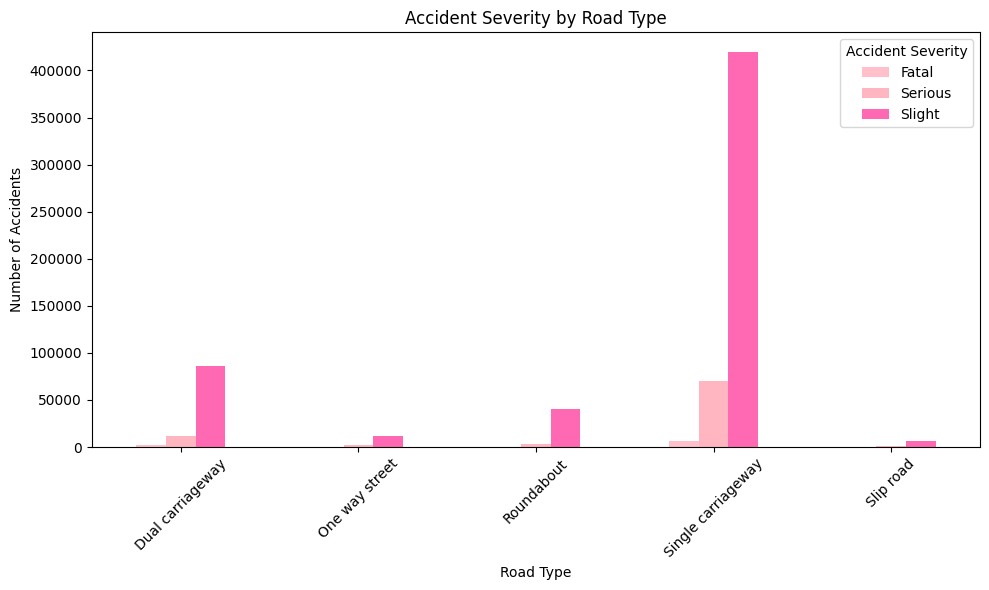

In [51]:
road_severity = {
    "Road_Type": ["Dual carriageway", "One way street", "Roundabout", "Single carriageway", "Slip road"],
    "Fatal": [1815, 95, 142, 6560, 49],
    "Serious": [11746, 1655, 3665, 70540, 611],
    "Slight": [85863, 11809, 40185, 419563, 6381]
}

road_severity = pd.DataFrame(road_severity)
road_severity.set_index("Road_Type", inplace=True)

severirty_s = road_severity[["Fatal", "Serious", "Slight"]]
severirty_s.plot(kind = "bar", figsize = (10,6), color = ["#FFC0CB", "#FFB6C1", "#FF69B4"])

plt.title("Accident Severity by Road Type")
plt.xlabel("Road Type")
plt.ylabel("Number of Accidents")
plt.legend(title = "Accident Severity")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

<h3>Insight 01: The data shows that <strong>single-carriageway</strong> roads have the most severe accidents. This happens because many vehicles pass through them even though there’s no divider, making head-on crashes more likely. Some drivers also use these roads as shortcuts, even when they are not meant for heavy traffic.</h3>

<h3>Insight 02: <strong>Dual carriageways</strong> did not record the highest number of severe accidents. This is because they have a central divider separating traffic, which lowers the chance of head-on collisions and makes driving safer compared to single-carriageways.</h3>

<h3>Insight 03: Other road types, like<strong>one-way streets, roundabouts, and slip roads</strong>, show fewer severe accidents. This may be because traffic is more controlled, with clear directions and restrictions that reduce the chances of high-impact crashes.</h3>

<hr>
<h3>Years dataframes</h3>

In [52]:
accident_2019 = uk_accidents[uk_accidents['Year'] == 2019]
accident_2020 = uk_accidents[uk_accidents['Year'] == 2020]
accident_2021 = uk_accidents[uk_accidents['Year'] == 2021]
accident_2022 = uk_accidents[uk_accidents['Year'] == 2022]

<hr>

<h2>13.In 2019, which weather conditions caused to road accidents?</h2>

In [53]:
accident_2019 = uk_accidents[uk_accidents['Year'] == 2019]
weather_counts = accident_2019['Weather_Conditions'].value_counts()

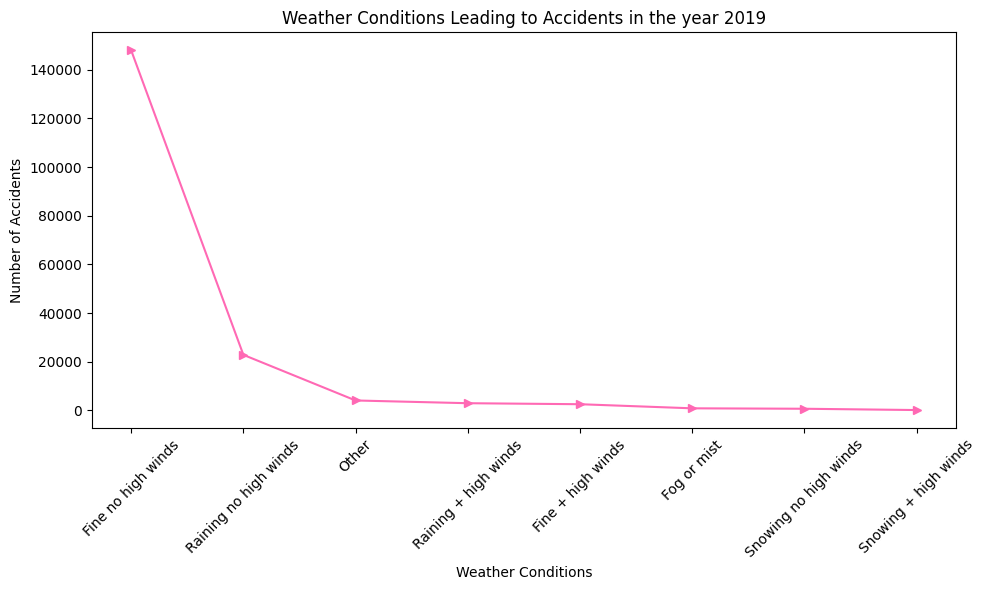

In [54]:
plt.figure(figsize=(10,6))
plt.plot(
    weather_counts.index, 
    weather_counts.values, 
    marker = '>', 
    linestyle = '-', 
    color = 'hotpink'
)

plt.title("Weather Conditions Leading to Accidents in the year 2019")
plt.xlabel("Weather Conditions")
plt.ylabel("Number of Accidents")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

<h3>Insight: In 2019, most accidents happened when the weather was <strong>fine with no strong winds</strong>. The line graph shows this condition had the highest number of accidents. This means accidents can still happen even in good weather, mostly because of drivers and heavy traffic, not just the weather.</h3>

<h2>14. In the years 2019 to 2022, how does accident severity vary between rural and urban areas, and what were the corresponding weather conditions during those accidents?</h2>



In [55]:
accidents = uk_accidents.groupby(['Urban_or_Rural_Area', 'Accident_Severity', 'Light_Conditions'])['Year'].size()
accidents.unstack()

Light_Conditions                       Darkness - lighting unknown  \
Urban_or_Rural_Area Accident_Severity                                
Rural               Fatal                                       41   
                    Serious                                    344   
                    Slight                                    2082   
Unallocated         Fatal                                        0   
                    Serious                                      0   
                    Slight                                       0   
Urban               Fatal                                       27   
                    Serious                                    450   
                    Slight                                    3540   

Light_Conditions                       Darkness - lights lit  \
Urban_or_Rural_Area Accident_Severity                          
Rural               Fatal                                578   
                    Serious                             3827   
                    Slight                             20290   
Unallocated         Fatal                                  0   
                    Serious                                0   
                    Slight                                 2   
Urban               Fatal                               1282   
                    Serious                            15303   
                    Slight                             88053   

Light_Conditions                       Darkness - lights unlit  \
Urban_or_Rural_Area Accident_Severity                            
Rural               Fatal                                   29   
                    Serious                                150   
                    Slight                                 782   
Unallocated         Fatal                                    0   
                    Serious                                  0   
                    Slight                                   0   
Urban               Fatal                                   16   
                    Serious                                210   
                    Slight                                1356   

Light_Conditions                       Darkness - no lighting  Daylight  
Urban_or_Rural_Area Accident_Severity                                    
Rural               Fatal                                1569      3384  
                    Serious                              6861     26130  
                    Slight                              27087    145836  
Unallocated         Fatal                                   0         0  
                    Serious                                 0         1  
                    Slight                                  0         8  
Urban               Fatal                                  43      1692  
                    Serious                               313     34628  
                    Slight                               1564    273201

<h3>Insight 01: In Urban, most accidents happen during the day and also at night even when streetlights are on. This means that lights help, but they don’t stop accidents. Urban roads are busy with cars and people, so it’s easy for accidents to happen.</h3>

<h3>Insight 02: Overall, urban have more accidents because of heavy traffic, but rural areas are more dangerous at night without lighting. So, accidents in urban happen more often, while in the rural, accidents can be more serious when it’s dark.</h3>

<h2>15. Among the years 2019 to 2022, which year recorded the highest number of accidents and which recorded the lowest?</h2>

In [56]:
uk_accidents.groupby('Year')['Index'].size()

Year
2019    182115
2020    170591
2021    163554
2022    144419
Name: Index, dtype: int64

<h3>Insight: From 2019 to 2022, the number of cases went down every year. In 2019, there were 182,115 cases, and by 2022, it dropped to 144,419. This shows that things are getting better over time, and fewer cases are happening each year.</h3>

<hr>
<h2>16. How many casualties are recorded in the dataset and which of them had the highest numbers that have listed?</h2>

In [57]:
uk_accidents['Number_of_Casualties'].unique()

array([ 1,  2,  3,  5,  9,  4,  7,  6,  8, 16, 40, 11, 22, 13, 25, 10, 28,
       19, 18, 15, 29, 14, 42, 68, 12, 17, 27, 32, 21, 62, 45, 47, 48, 24,
       26, 43])

In [58]:
uk_accidents['Number_of_Casualties'].value_counts()

Number_of_Casualties
1     504041
2     107971
3      30776
4      11156
5       4123
6       1525
7        539
8        214
9        112
10        58
11        36
13        24
12        21
14        13
15        11
17         8
19         7
16         7
18         6
22         5
21         4
29         3
40         2
28         2
24         2
27         2
42         2
25         1
32         1
68         1
45         1
62         1
47         1
48         1
26         1
43         1
Name: count, dtype: int64

<h3>Insight 01: Most accidents involve only a few people. Looking at the data, the majority of accidents result in just 1 or 2 people being hurt. For example, accidents with 1 casualty happen more than 500,000 times. This means that small accidents are very common, while accidents hurting many people are rare.</h3>

<h3>Insight 02: Accidents with many casualties are rare. As the number of people hurt increases, accidents become much less frequent. Very serious accidents with more than 10 casualties happen only a few times.</h3>

<hr>
<h1>A Data Analysis Journey: From National Trends to Local Insights </h1>
<p>Adding 6 more insights with different District Areas.</p>
<hr>

<h1>Breakdown of Accident Counts by Year, Month, and Day. </h1>

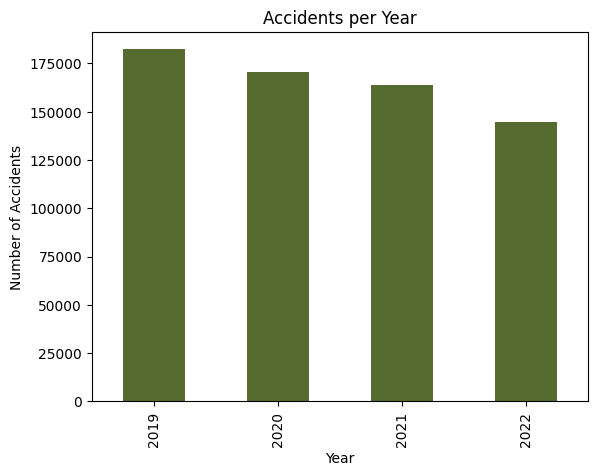

Year
2019    182115
2020    170591
2021    163554
2022    144419
Name: count, dtype: int64


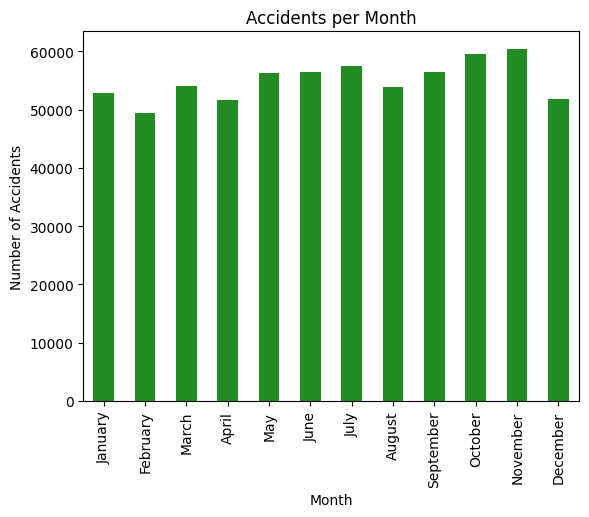

DayOfWeek
Monday        72680
Tuesday       94550
Wednesday     99558
Thursday      99511
Friday        97900
Saturday     107178
Sunday        89302
Name: count, dtype: int64


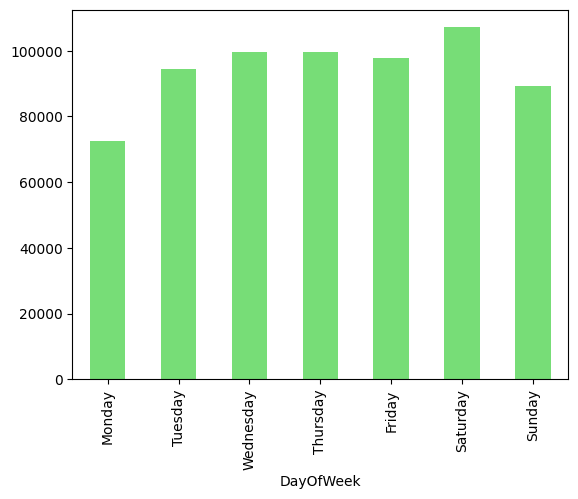

In [59]:
accidents_per_year = uk_accidents['Year'].value_counts().sort_index()
accidents_per_month = uk_accidents['Month'].value_counts().sort_index()
accidents_per_day = uk_accidents['DayOfWeek'].value_counts().sort_index()

accidents_per_year.plot(kind='bar', color = '#556B2F')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

print(accidents_per_year)

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month.index = accidents_per_month.index.map(month_names)

accidents_per_month.plot(kind = 'bar', color = '#228B22')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day.index = accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar', color = '#77DD77')
print(accidents_per_day)

In [60]:
for x in uk_accidents['District Area'].unique():
    print(x)

Kensington and Chelsea
Westminster
Richmond upon Thames
Hammersmith and Fulham
Hounslow
Tower Hamlets
City of London
Southwark
Camden
Hackney
Islington
Barnet
Brent
Haringey
Merton
Ealing
Enfield
Greenwich
Newham
London Airport (Heathrow)
Hillingdon
Waltham Forest
Redbridge
Barking and Dagenham
Bromley
Havering
Croydon
Lambeth
Wandsworth
Sutton
Bexley
Lewisham
Harrow
Kingston upon Thames
Barrow-in-Furness
South Lakeland
Carlisle
Eden
Allerdale
Copeland
Fylde
Blackpool
Wyre
Lancaster
Chorley
West Lancashire
South Ribble
Preston
Blackburn with Darwen
Hyndburn
Ribble Valley
Burnley
Pendle
Rossendale
Wirral
Liverpool
Sefton
Knowsley
St. Helens
Manchester
Salford
Tameside
Stockport
Bolton
Wigan
Trafford
Bury
Rochdale
Oldham
Chester
Vale Royal
Halton
Warrington
Crewe and ntwich
Ellesmere Port and Neston
Congleton
Macclesfield
Crewe and Nantwich
Blyth Valley
Sunderland
Gateshead
North Tyneside
Tynedale
Berwick-upon-Tweed
Newcastle upon Tyne
Castle Morpeth
South Tyneside
Wansbeck
Alnwick
Wear 

In [61]:
uk_accidents['District Area'].value_counts().head(7)

District Area
Birmingham     13491
Leeds           8898
Manchester      6720
Bradford        6212
Sheffield       5710
Westminster     5706
Liverpool       5587
Name: count, dtype: int64

In [62]:
uk_accidents['District Area'].describe()

count         660679
unique           422
top       Birmingham
freq           13491
Name: District Area, dtype: object

In [63]:
import folium
from  folium.plugins import HeatMap

<hr>
<h2>17. How many accidents in Birmingham are recorded per year, month, and day of the week? Also, have the accident counts decreased over time?</h2>
<h3>District Area 01: Birmingham</h3>

In [85]:
# Birmingham_df = uk_accidents[uk_accidents['District Area'] == 'Birmingham']

# Birmingham_locations = list(zip(uk_accidents['Latitude'], uk_accidents['Longitude']))
# Birmingham_map = folium.Map(locations=[uk_accidents['Latitude'].mean(), uk_accidents['Longitude'].mean()], zoom_start=10)
# HeatMap(Birmingham_locations).add_to(Birmingham_map)
# Birmingham_map.save('Birmingham_heatmap.html')
# Birmingham_map

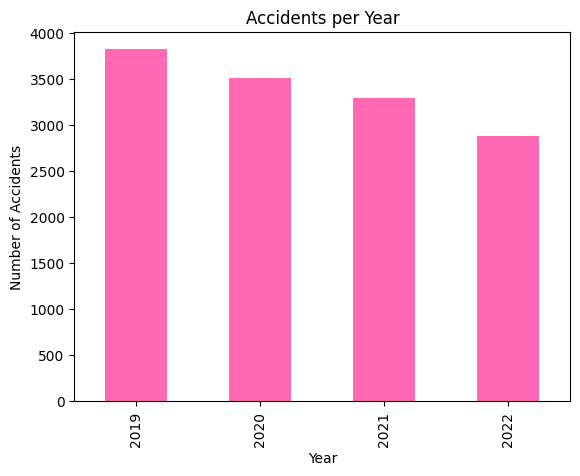

Year
2019    3820
2020    3506
2021    3289
2022    2876
Name: count, dtype: int64


In [65]:
birmingham_district = uk_accidents[uk_accidents['District Area'] == 'Birmingham']

accidents_per_year = birmingham_district['Year'].value_counts().sort_index()
accidents_per_month = birmingham_district['Month'].value_counts().sort_index()
accidents_per_day = birmingham_district['DayOfWeek'].value_counts().sort_index()

accidents_per_year.plot(kind='bar', color = 'hotpink')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

print(accidents_per_year)

<h3>Insight 01: The counts of accidents that the record and also the visualization shows that over year the counts decreased. I surf online and found out that the reason why the record decreased was simply because of the "Pandemic" that happened way back in 2020 and obviously that time peoples are not allowed to go outside so tantamount saying that the count of accidents were gonna go down.  
</h3>
<p>
National Trends (2019-2022)
2019: Reported road deaths were around 1,752 in Great Britain, with casualties of all severities decreasing by 5% compared to 2018, according to the annual report from GOV.UK. 

2020: A significant drop in casualties was seen across Great Britain due to the effects of the COVID-19 lockdown, leading to fewer cars on the road. 

2021-2022: Overall trends showed decreases in fatalities compared to 2019, but with large percentage changes for pedestrian and pedal cyclist fatalities, which declined significantly. </p>

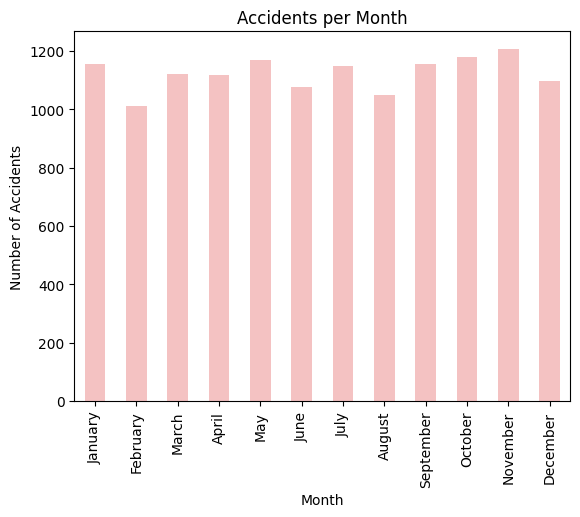

In [66]:
month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

accidents_per_month.index = accidents_per_month.index.astype(int).map(month_names)

accidents_per_month.plot(kind = 'bar', color = '#F4C2C2')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

<h3>Insight 02: The graph simply shows the analyzed data that per month has about the number of accidents, February had the lowest number of accidents, all in all the counts/number was just goes up and down, nothing much.  </h3>

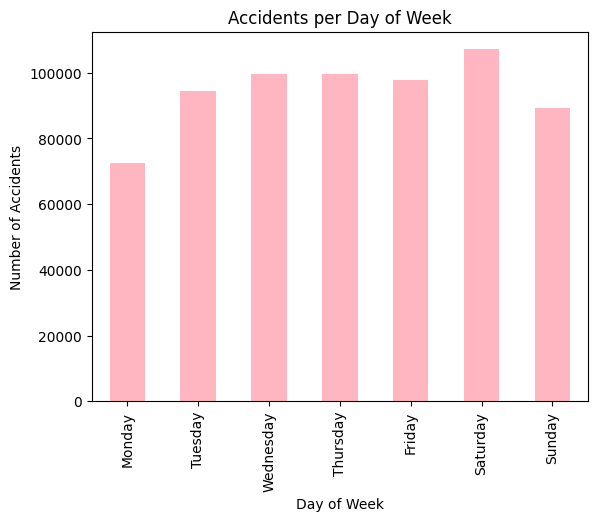

DayOfWeek
Monday        72680
Tuesday       94550
Wednesday     99558
Thursday      99511
Friday        97900
Saturday     107178
Sunday        89302
Name: count, dtype: int64


In [67]:
day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

accidents_per_day = uk_accidents['DayOfWeek'].value_counts().sort_index()
accidents_per_day.index = accidents_per_day.index.map(day_names)

per_day = accidents_per_day.plot(kind='bar', color='#FFB6C1')
per_day.set_xlabel('Day of Week')
per_day.set_ylabel('Number of Accidents')
per_day.set_title('Accidents per Day of Week')
plt.show()

print(accidents_per_day)

<h3>Insight 03: The bar plot reveals distinct patterns in road accidents across the days of the week, which can be used to understand driver behavior and improve traffic safety planning.
</h3>
<p>
Saturday: 107,178 <strong>(highest number of accidents that happened in a week)</strong>
<p>Wednesday: 99,558</p>


Thursday: 99,511

Friday: 97,900

Tuesday: 94,550

Sunday: 89,302

Monday: 72,680 <strong>(lowest among the days)</strong></p>

<hr>
<h2>18. Is there a significant difference between the national accident severity data and the severity of accidents recorded in the Boston district in 2020?</h2>
<h3>District Area 02: Boston</h3>

In [80]:
# Boston_df = uk_accidents[uk_accidents['District Area'] == 'Boston']

# Boston_locations = list(zip(uk_accidents['Latitude'], uk_accidents['Longitude']))
# Boston_map = folium.Map(locations=[uk_accidents['Latitude'].mean(), uk_accidents['Longitude'].mean()], zoom_start=10)
# HeatMap(Boston_locations).add_to(Boston_map)
# Boston_map.save('Boston_heatmap.html')
# Boston_map

In [69]:
import seaborn as sns

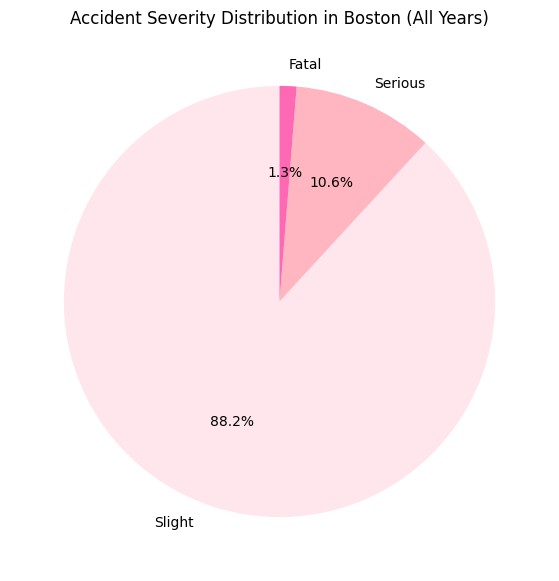

Accident_Severity
Slight     834
Serious    100
Fatal       12
Name: count, dtype: int64


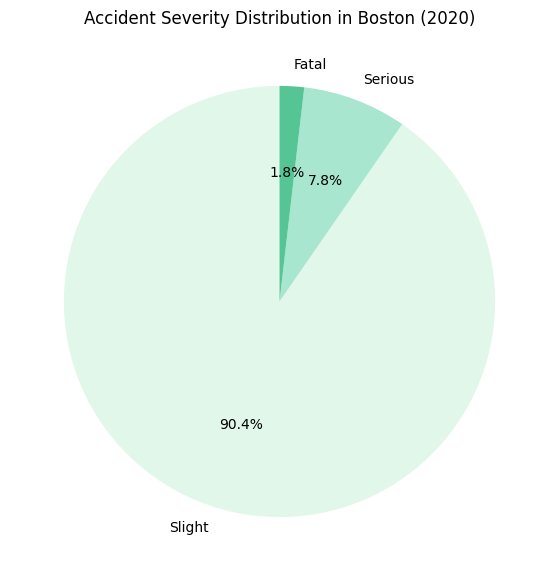

Accident_Severity
Slight     197
Serious     17
Fatal        4
Name: count, dtype: int64


In [70]:
bos_df = uk_accidents[uk_accidents['District Area'] == 'Boston']
severity_bos = bos_df['Accident_Severity'].value_counts()

colors_all_years = ['#ffe6ec', '#ffb6c1', '#ff69b4'] 
plt.pie(
    severity_bos,
    labels=severity_bos.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors_all_years
)
plt.gcf().set_size_inches(10, 7)
plt.title('Accident Severity Distribution in Boston (All Years)')
plt.show()

print(severity_bos)

severity_2020_bos = bos_df[bos_df['Year'] == 2020]
lsc_2020 = severity_2020_bos['Accident_Severity'].value_counts()

colors_2020 = ['#e0f7e9', '#a8e6cf', '#56c596'] 
plt.pie(
    lsc_2020,
    labels=lsc_2020.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors_2020
)
plt.gcf().set_size_inches(10, 7)
plt.title('Accident Severity Distribution in Boston (2020)')
plt.show()

print(lsc_2020)


<h3>Insight: There is a significant difference in all years accident severity, of course the larger scope it has the higher number of accident severity will be recorded, even the highest accident severity were both 'Slight' the data of <strong>all years</strong> still had the highest 'coz it has 834 counts (88.2%) while on the other hand Boston in year 2020  was 197 with the percent of 90.4%, but the percentage shows different and that's because of the other components the severity has (Serious and Fatal) also with different count numbers as well. </h3>

In [71]:
uk_accidents

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type,Year,Month,Day,DayOfWeek
0,200701BS64157,Serious,2019-06-05,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Serious,Single carriageway,Urban,Fine no high winds,Car,2019,6,5,2
1,200701BS65737,Serious,2019-07-02,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Serious,Single carriageway,Urban,Raining no high winds,Car,2019,7,2,1
2,200701BS66127,Serious,2019-08-26,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Serious,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car,2019,8,26,0
3,200701BS66128,Serious,2019-08-16,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Serious,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats),2019,8,16,4
4,200701BS66837,Slight,2019-09-03,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Slight,Single carriageway,Urban,Fine no high winds,Other vehicle,2019,9,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,2022-02-18,57.374005,Daylight,Highland,-3.467828,2,1,Slight,Single carriageway,Rural,Fine no high winds,Car,2022,2,18,4
660675,201091NM01881,Slight,2022-02-21,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Slight,Single carriageway,Rural,Fine no high winds,Car,2022,2,21,0
660676,201091NM01935,Slight,2022-02-23,57.585044,Daylight,Highland,-3.862727,1,3,Slight,Single carriageway,Rural,Fine no high winds,Car,2022,2,23,2
660677,201091NM01964,Serious,2022-02-23,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Serious,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc,2022,2,23,2


<hr>
<h2>19. How did monthly road accidents in Manchester change from 2019 to 2022?</h2>
<h3>District Area 03: Manchester</h3>

In [81]:
# man_df = uk_accidents[uk_accidents['District Area'] == 'Liverpool']

# man_locations = list(zip(man_df['Latitude'], man_df['Longitude']))
# man_map = folium.Map(
#     location=[man_df['Latitude'].mean(), man_df['Longitude'].mean()],
#     zoom_start=11
# )
# HeatMap(man_locations).add_to(man_map)
# man_map.save('manchester_heatmap.html')
# man_map  

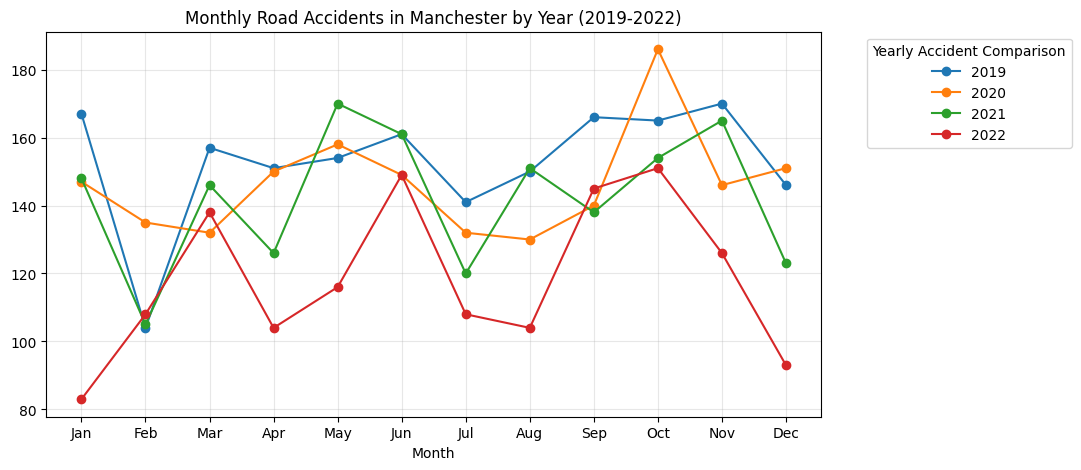

In [72]:
man_df = uk_accidents[uk_accidents['District Area'] == 'Manchester']
monthly_mandata = man_df.groupby(['Year', 'Month']).size()

monthly_mandata = monthly_mandata.unstack(level=0)

monthly_mandata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in Manchester by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

<h3>Insight: In Year 2020 month of September when the number of road accidents starts to increased it took 2 months to finally decreased, while in the Year 2022 it starts in the lowest part means that the accident happens was not that rapidly increasing also in this year it did not increased too much in fact by the month of october where the highest counts can be seen has starts to decreased until the last month.</h3>

<hr>
<h2>20. What Light Conditions cause high casualties in Liverpool District?</h2>
<h3>District Area 04: Liverpool</h3>

In [82]:
# liverpool_df = uk_accidents[uk_accidents['District Area'] == 'Liverpool']

# liverpool_locations = list(zip(liverpool_df['Latitude'], liverpool_df['Longitude']))
# liverpool_map = folium.Map(
#     location=[liverpool_df['Latitude'].mean(), liverpool_df['Longitude'].mean()],
#     zoom_start=11
# )
# HeatMap(liverpool_locations).add_to(liverpool_map)
# liverpool_map.save('liverpool_heatmap.html')
# liverpool_map  

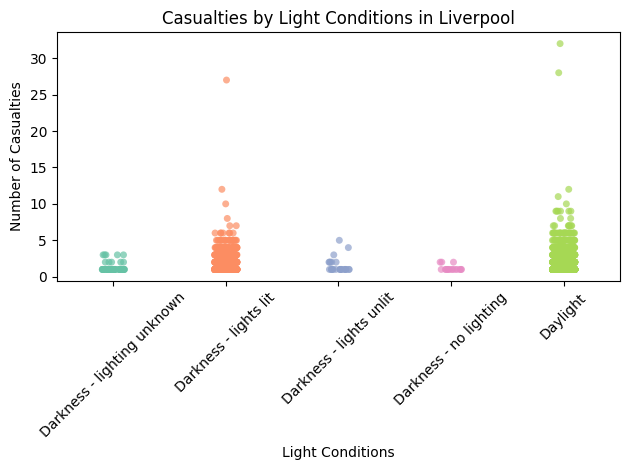

In [74]:
sns.stripplot(
    x='Light_Conditions',
    y='Number_of_Casualties',
    data=liverpool_df,
    jitter=True,
    palette='Set2',
    alpha=0.7
)

plt.title("Casualties by Light Conditions in Liverpool")
plt.xlabel("Light Conditions")
plt.ylabel("Number of Casualties")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<h3>Insight:Most of the accidents with the highest number of casualties happened during daylight. But there’s this one road that caught my attention because many accidents seem to happen along it. When I looked it up online, I found that it’s a busy road in a student area, and it’s also known for its nightlife. The Smithdown Road.</h3>

<p><ul>Smithdown Road is a historic and busy road in Liverpool, England, that forms part of the A562 and is a major student area, known for its vibrant nightlife, bars, pubs, and restaurants.</ul></p>

<h3>Even though "darkness – lights lit" is the second most common condition for accidents, you can tell this road is very active at night. People, especially students, tend to stay out late, so accidents probably do happen during those hours too. But since it’s a student area, there’s a lot going on during the daytime — with traffic, people walking around, and even things like police car crashes. That’s likely why most accidents happen during the day, even if the road is busy at night too.</h3>

<hr>
<h2>21. How did the most common road surface condition in Clackmannanshire in 2019 compare to the conditions reported between 2020 and 2022?</h2>
<h3>District Area 05: Clackmannanshire </h3>

In [83]:
# c_df = uk_accidents[uk_accidents['District Area'] == 'Liverpool']

# c_locations = list(zip(c_df['Latitude'], c_df['Longitude']))
# c_map = folium.Map(
#     location=[c_df['Latitude'].mean(), c_df['Longitude'].mean()],
#     zoom_start=11
# )
# HeatMap(c_locations).add_to(c_map)
# c_map.save('clackmannshire_heatmap.html')
# c_map  

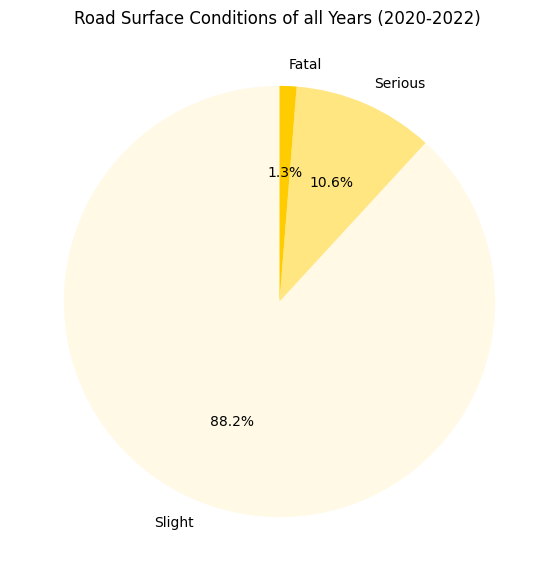

Road_Surface_Conditions
Slight     72
Serious    18
Fatal       1
Name: count, dtype: int64


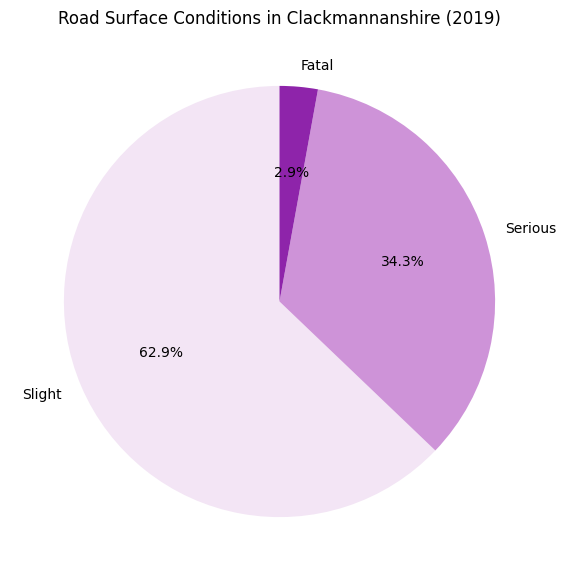

Road_Surface_Conditions
Slight     22
Serious    12
Fatal       1
Name: count, dtype: int64


In [75]:
clmn_df = uk_accidents[uk_accidents['District Area'] == 'Clackmannanshire']
severity_clmn = clmn_df['Road_Surface_Conditions'].value_counts()

colors_years = ['#fff9e6', '#ffe680', '#ffcc00']
plt.pie(
    severity_bos,
    labels=severity_bos.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors_years
)
plt.gcf().set_size_inches(10, 7)
plt.title('Road Surface Conditions of all Years (2020-2022) ')
plt.show()

print(severity_clmn)

severity_2019_clmn = clmn_df[clmn_df['Year'] == 2020]
lsc_2019 = severity_2019_clmn['Road_Surface_Conditions'].value_counts()

colors = ['#f3e5f5', '#ce93d8', '#8e24aa']
plt.pie(
    lsc_2019,
    labels=lsc_2019.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors
)
plt.gcf().set_size_inches(10, 7)
plt.title('Road Surface Conditions in Clackmannanshire (2019)')
plt.show()

print(lsc_2019)


<h3>Insight: From 2020 to 2022, there were more slight accidents (72) in Clackmannanshire than in 2019 (22). Serious accidents also went up a little, from 12 to 18. The number of fatal accidents stayed the same, with 1 each time. So, overall, there were more accidents, but the number of very serious or fatal ones didn’t change much.</h3>

<hr>
<h2>22. What are the Monthly Number of Casualties in Telford and Wrekin District? </h2>
<h3>District Area 06: Telford and Wrekin</h3>

In [84]:
# tw_df = uk_accidents[uk_accidents['District Area'] == 'Liverpool']

# tw_locations = list(zip(tw_df['Latitude'], tw_df['Longitude']))
# tw_map = folium.Map(
#     location=[tw_df['Latitude'].mean(), tw_df['Longitude'].mean()],
#     zoom_start=11
# )
# HeatMap(tw_locations).add_to(tw_map)
# tw_map.save('Telford_and_Wrekin_heatmap.html')
# tw_map  

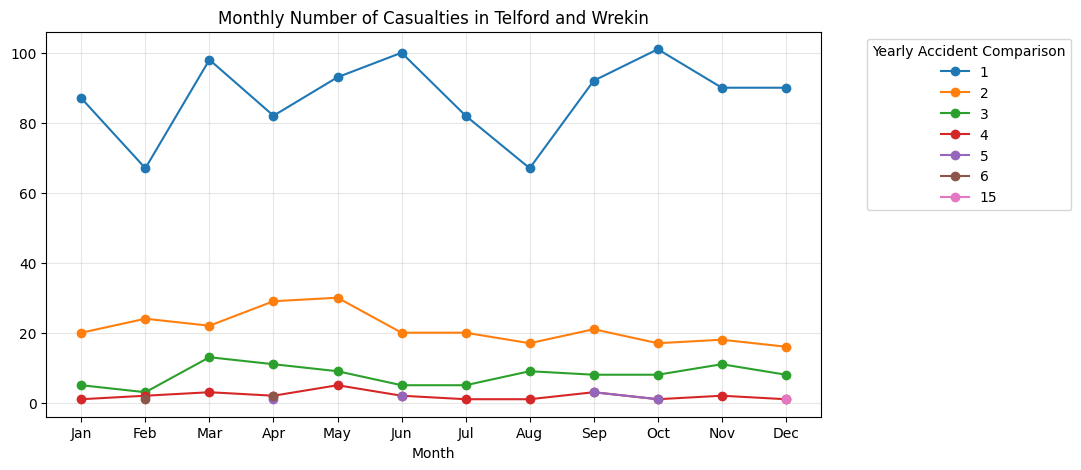

Number_of_Casualties     1     2     3    4    5    6    15
Month                                                      
1                      87.0  20.0   5.0  1.0  NaN  NaN  NaN
2                      67.0  24.0   3.0  2.0  NaN  1.0  NaN
3                      98.0  22.0  13.0  3.0  NaN  NaN  NaN
4                      82.0  29.0  11.0  2.0  1.0  2.0  NaN
5                      93.0  30.0   9.0  5.0  NaN  NaN  NaN
6                     100.0  20.0   5.0  2.0  2.0  NaN  NaN
7                      82.0  20.0   5.0  1.0  NaN  NaN  NaN
8                      67.0  17.0   9.0  1.0  NaN  NaN  NaN
9                      92.0  21.0   8.0  3.0  3.0  NaN  NaN
10                    101.0  17.0   8.0  1.0  1.0  NaN  NaN
11                     90.0  18.0  11.0  2.0  NaN  NaN  NaN
12                     90.0  16.0   8.0  1.0  NaN  NaN  1.0


In [76]:
tw_df = uk_accidents[uk_accidents['District Area'] == 'Telford and Wrekin']
monthly_twdata = tw_df.groupby(['Number_of_Casualties', 'Month']).size()

monthly_twdata = monthly_twdata.unstack(level=0)

monthly_twdata.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Number of Casualties in Telford and Wrekin'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

print(monthly_twdata)

<h3>Insights: In Telford and Wrekin, most accidents each month involved just 1 person getting hurt. The highest numbers of these happened in October, June, and March. Accidents with 2 or 3 people hurt also happened but were less common. More serious accidents with 4 or more people involved were rare. The biggest accident happened in December, where 15 people were hurt in a single crash.</h3>